In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,41393,None,None,85794.334815
2020-06-13,41394,None,None,79700.232992
2020-06-14,41395,None,None,74046.952859
2020-06-15,41396,None,None,68721.889852
2020-06-16,41397,None,None,63978.915435
...,...,...,...,...
2021-03-21,41675,None,None,75839.727542
2021-03-22,41676,None,None,74863.145074
2021-03-23,41677,None,None,73921.729888


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-25_2021-03-25-17-49.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-24_2021-03-24-18-10.pickle


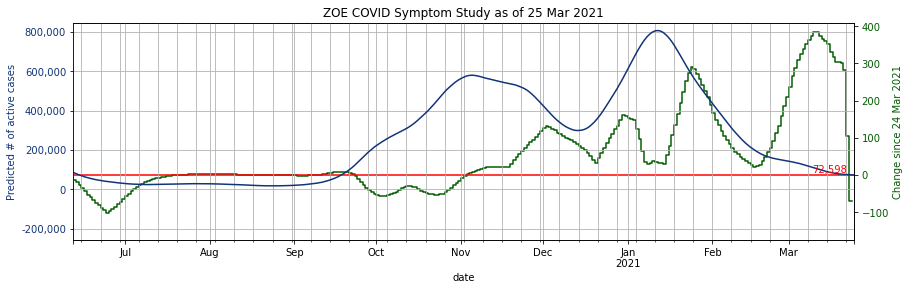

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

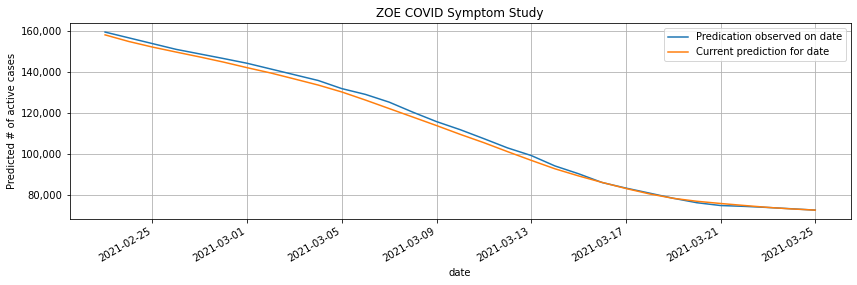

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-25_2021-03-25-17-49.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
373,North Ayrshire,S12000021,0.745886
333,Flintshire,W06000005,0.733341
324,East Dunbartonshire,S12000045,0.517321
208,Ashfield,E07000170,0.503345
209,Broxtowe,E07000172,0.410293
302,Kirklees,E08000034,0.393882
7,Halton,E06000006,0.381288
128,Harlow,E07000073,0.371896
297,Falkirk,S12000014,0.369611
113,East Dorset,E07000049,0.353735
